# Step by Step YOLOV3 with OPENCV 

In this notebook, I try to explain object detection with yoloV3 and opencv. When you make a quick search, you can easily find an object detection code with yoloV3. This notebook is one of them with extra explanations. I just want to explain 'what codes returns and how we use that' .The theorical explanation of yolo or yoloV3 is out of consept,but to explain some points I will give information about architecture of YoloV3. For original images and codes, you can check reference links at the end.

For object detection with yoloV3 and opencv, You should have 3 files. These three files are weights,cfg and names. The weights file contains weights of model. The cfg file contains the configurations of model and name file contains the name of objects in the dataset. If you trained your own model, you should use your own files.

In this notebook, I used pre-trained yolov3 weights on COCO dataset. The weights,cfg and names files can be found on the internet easily. The model was trained with COCO dataset(which has 80 classes). Because of that reason our model can detect only these 80 classes. You can see the class names in 'coco.names' file.

Let's load our files and begin to understand detection algorithm

In [1]:
#first import necessary packages
import numpy as np
import time
import cv2
print('packages are loaded...')

packages are loaded...


If you check the coco.names file, you can see that it contains classes in each row. We want to take these classes and put them in a list. Why we do that?  When we make a detection our codes return a number,which will be the index of that list. This index value make no sense for a person, so we should change it to name in this list. 

In [2]:
# then load our cfg
labelsPath='coco.names'
labels = open(labelsPath).read().strip().split("\n")
#and show what it contains, wht its type and lenght
print(labels)

print('type of labels is  '+ str(type(labels)))
print('lenght of labels is  '+ str(len(labels)))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
type of labels is  <class 'list'>
lenght of labels is  80


If you see an output image of object detection, The objects are shown in rectangles (which is called bounding-box). For a good visualization, each class should have a constant color for that rectangle. to specify that color we use these commands 

In [3]:
# for 80 classes, 80 different colors
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(labels), 3),dtype="uint8")


In [25]:
# load our YOLO object detector trained on COCO dataset (80 classes) and cfg
weightsPath ='yolov3.weights'
configPath ='yolov3.cfg'

In [26]:
#then we load our model with dnn library
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
type(net)

cv2.dnn_Net

In [27]:
ln = net.getLayerNames()
print(ln)

['conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

When you check 'what is inside ln', you can see layer names of yolov3. The architecture of YoloV3 is ready in yolov3.cfg file. You can see that layers also in that file. In this point, I try to explain a confusing situation about the number of CNN layers in yoloV3.

If you make a quick search about yoloV3, you can find out that yoloV3 is trained by using Darknet-53 framework. And number in this framework means the number of CNN layers which is 53. You can see the Darknet structure below : 

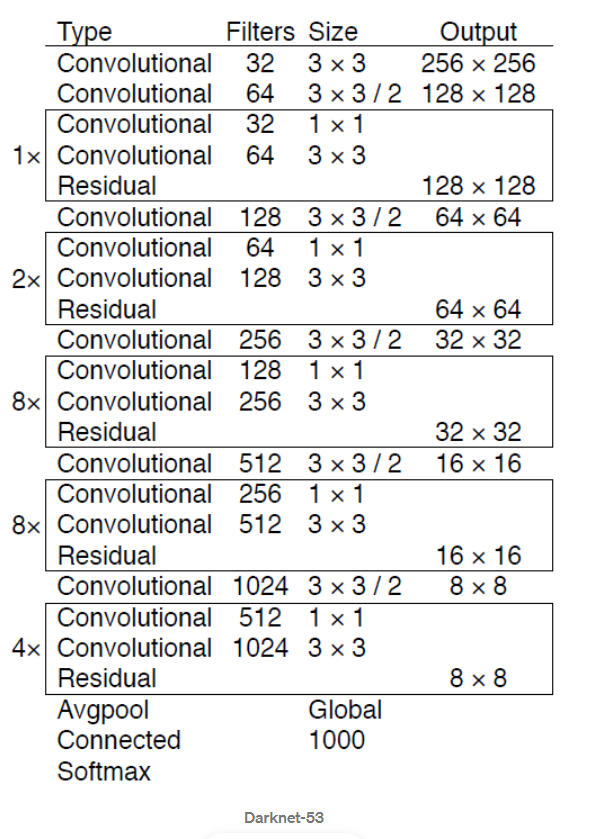

BUT if you open cfg file, you will see 75 convolutional layers.

There is more... If you check 'ln' which includes the layer names, you will see there are 107(not 106 because of 0 index) layers :) 

The reason for that situation is other layers (shortcut,route,upsample,yolo). Basically, we can say yolov3 75 CNN layers and 32 other layers. You can predict the other layers' roles in model, but the 'yolo' layers may be hard to guess. These layers make the predictions. 

As you can see there are 3 yolo layers.It means yoloV3 does detections at 3 different scales, which are at layers 82,94,106. The first layer detects the largest objects, the second the ones in the middle, and the last layer all that remains. If you check the image of yoloV3 architecture, you can see the scale difference and the number of cells which divide the image to make prediction of bounding box.

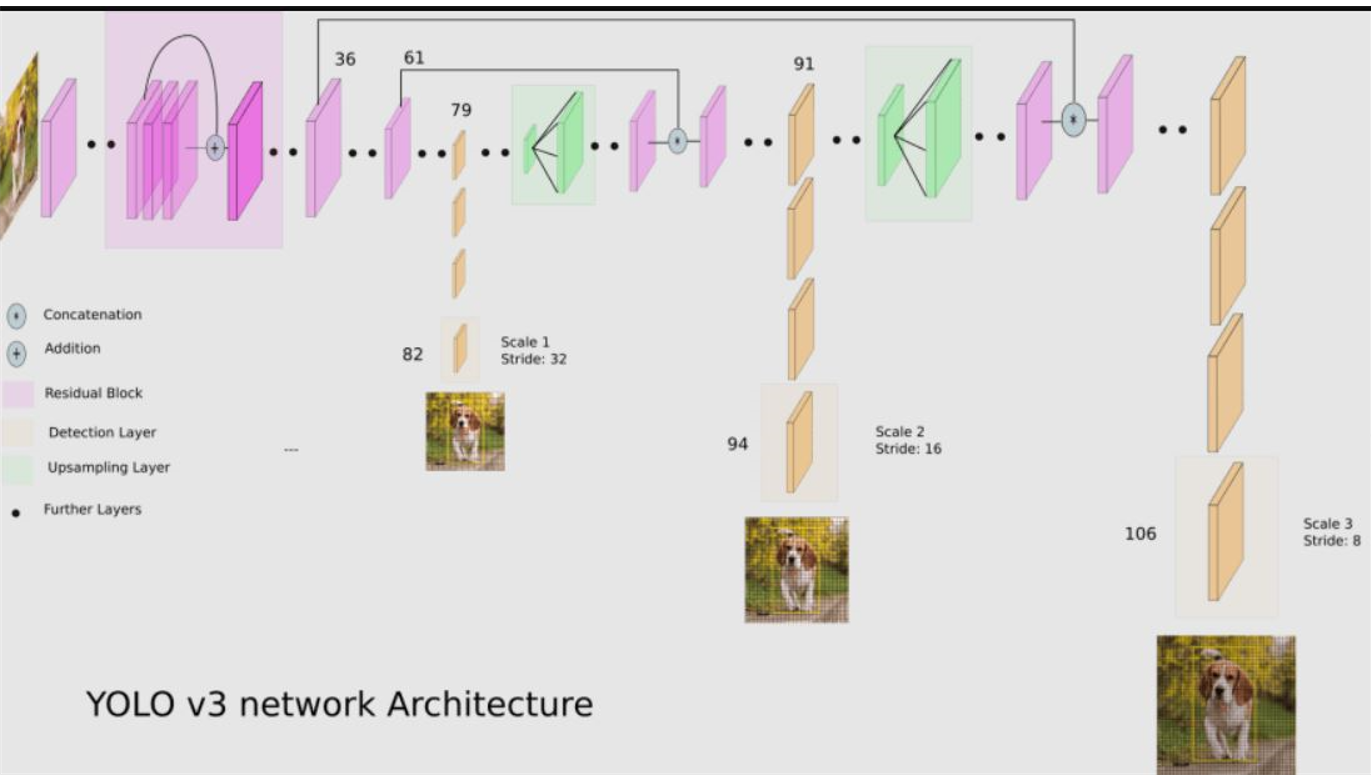

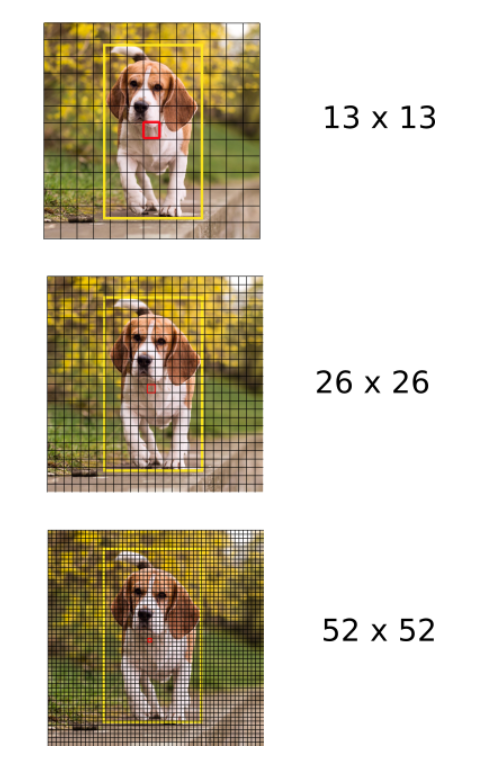


I put layers_and_filters.txt in repo. When you check this txt files, you can see the input and output of layers for yoloV3. If you look at the output dimensions of the layers,just before the detection layers, you will see the feature maps for detections are 13x13,26x26 and 52x52. In the same order, the stride of the network are 32,16 and 8. 13x32, 26x16 or 52x8 will give 416 and it is not a suprising result because 416x416 is the dimension of input for yolov3 architecture.

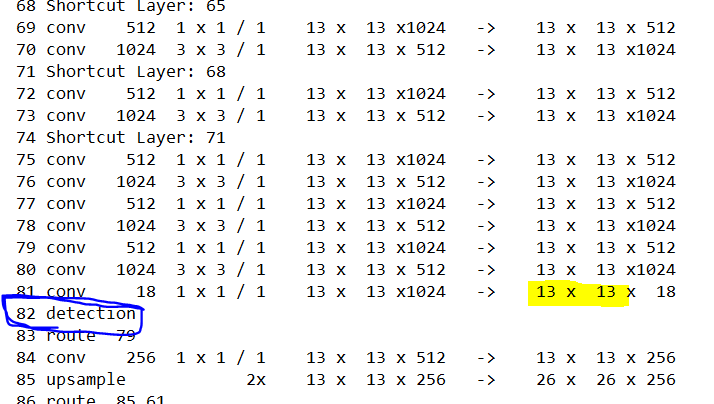


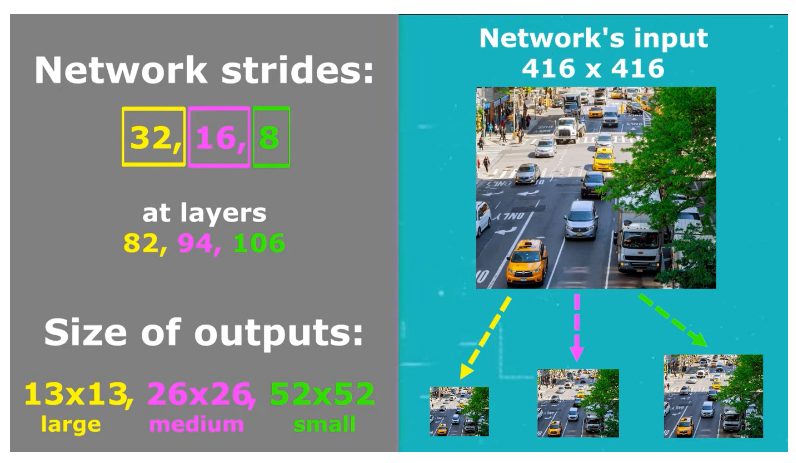



For details, you can check the reference links.


Let's continue digging in our detection code...

As you can understand from above, we need the Yolo layers and outputs of that layers. For this purpose, we will find the index of layers and use them for detection.

In [28]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

after finding the index of output layers, We update our 'ln' with yolo layers.

In [29]:
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


Now our model is ready for detection. Let's load an image and show the results details.

We easily load image with opencv and resize it. Resizing is not necessary, but you should take images dimensions because we will need them to scale our detection.

In [32]:
#load image
image = cv2.imread('dog1.jpg')
image=cv2.resize(image,(416,416))
#take dimensions
(H, W) = image.shape[:2]

With opencv dnn module, we can easily prepare our image for correct format to be fed into the model. You can find details and parameters of this step from documentation. 

Then we will put the blob as an input of our model, which we loaded before.

At least, we use forward() function for forward propagating the blob through the model, which gives us outputs.

In [33]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
net.setInput(blob)
layerOutputs = net.forward(ln)

In [37]:
print(type(layerOutputs))
print(len(layerOutputs))
print(np.shape(layerOutputs))

<class 'list'>
3
(3,)


C:\Users\Zeki\anaconda3\envs\heatmap\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


layerOutputs is our result, which is a list but as you can understand from the warning we have a problem about its dimensions. When we check the dimension, we find out that our result has 3 list and the length of these lists are 507,2028 and 8112. What is that numbers???

They are the numbers of predictions from each scale. If you remember, yolov3 does detection at 3 different scales. These are the detection results from that layers. But why these(507,2028,8112 numbers??



In [38]:
row=len(layerOutputs)
print(row)
column=len(layerOutputs[0])
print(column)
column=len(layerOutputs[1])
print(column)
column=len(layerOutputs[2])
print(column)

3
507
2028
8112


YoloV3 uses 'anchor boxes' for predicting bounding boxes. It uses 3 anchor boxes for each scales. If you remember the dimension of output stages (13x13,26x26,52x52), just multiply them with 3(number of anchor boxes) and the results are the number of predicted bounding boxes ( in the same row 507,2028,8112).

Until now, we loades our network, loaded our image , prepared our image to network and forwarded to prediction. Now we have about 10,847 bounding box(507+2028+8112), and next?? Let's see what our model predicted at each scale.

We will take the first scale outputs as 'scale_1'. It has 507 values in it. When we look its dimensions, we will see (507,85).

We've already known that 507 number of bounding box, but what about 85. These values are : the first 4 values are bounding box offset, 5th value is for objectness prediction and the other 80 are the prediction for each classes on dataset. As you remember we use COCO dataset and we have 80 classes. If you train your model with custom dataset, this number will be different.

In [41]:
scale_1=layerOutputs[0]
print(len(scale_1))
print(scale_1.shape)
detection_1=scale_1[0]
print(detection_1)
print(len(detection_1))
print(type(detection_1))

507
(507, 85)
[4.5615580e-02 2.8827660e-02 2.4503115e-01 2.1419039e-01 1.1609895e-08
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000

Above you see the first bounding box prediction result for first scale. As you can see there are lots(80) of zero and the objectness prediction is very low. We can easily say that 'there is nothing in this bounding box'.The dimensions are scaled, if you want to see 'where is that bounding box in real image', you should multiply them with weight and height of image.

To understand, I also want to show a list with a prediction. For that purpose I will check the value of class predictions.

In [52]:
detection_2=scale_1[245]
print(detection_2)
#to show class ID
scores = detection_2[5:]
classID = np.argmax(scores)
print('class ID is '+ str(classID))

[0.2474385  0.5315335  0.5110913  0.8378306  0.98916024 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.9799483  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
class ID is 16


It looks like the 245th bounding box have some thing in it. If you don't know anything about your classes, results make no sense. But if you check your class ID and look at you names file, you can easily see that your model found a 'dog' in image.

Lets see how our 1. and 245. bounding boxes are shown on our image

In [54]:
box = detection_1[0:4] * np.array([W, H, W, H])
(centerX, centerY, width, height) = box.astype("int")
x = int(centerX - (width / 2))
y = int(centerY - (height / 2))
cv2.rectangle(image, (x, y), (x + width, y +height),(0,0,250), 2)
print(box)
    
#print(centerY)
cv2.imshow("Image", image)
cv2.waitKey(0)

box2 = detection_2[0:4] * np.array([W, H, W, H])
(centerX, centerY, width, height) = box2.astype("int")
x = int(centerX - (width / 2))
y = int(centerY - (height / 2))
cv2.rectangle(image, (x, y), (x + width, y +height),(0,0,250), 2)
print(box)
    
#print(centerY)
cv2.imshow("Image2", image)
cv2.waitKey(0)

[ 18.97608125  11.99230647 101.93295765  89.10320377]
[ 18.97608125  11.99230647 101.93295765  89.10320377]


-1

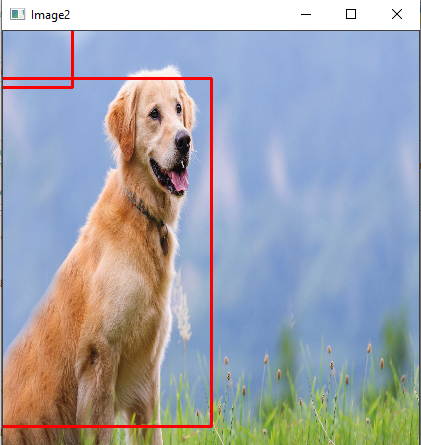



But we have 10,847 bounding boxes, we can not open all of them and check what it has in it. So we should prepare a for loop and check the probability of classes for each bounding box.If the probability of class is bigger than the threshold value,we collect their parameters in a list. for that purpose we will run this code :

In [55]:
boxes = []
confidences = []
classIDs = []
prob_thr=0.8
for layer in layerOutputs:
    # loop over each of the detections
    for detection in layer:
        #check scores(prob of classes) and take the class id of max. prob.
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        # filter out weak predictions
        if confidence > prob_thr:
            # scale the bounding box coordinates back
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [58]:
print(boxes)
print(len(boxes))

[[-10, 43, 206, 353], [-4, 47, 212, 348], [-3, 37, 195, 381], [-3, 37, 207, 381]]
4


In [59]:
print(classIDs)
print(len(classIDs))

[16, 16, 16, 16]
4


In [60]:
print(confidences)
print(len(confidences))

[0.970739483833313, 0.9799482822418213, 0.9832901358604431, 0.9893166422843933]
4


Our model predicts 4 bounding box with a high confidence and all of them are dog. But we have only one dog in image. What is wrong? First let's see our bounding boxes.

In [68]:
image_again = cv2.imread('dog1.jpg')
image_again=cv2.resize(image_again,(416,416))
image_again2=image_again.copy()
for i in range(len(boxes)):
    (x, y) = (boxes[i][0], boxes[i][1])
    (w, h) = (boxes[i][2], boxes[i][3])
    color=random.sample(range(0, 255), 3)
    cv2.rectangle(image_again2, (x, y), (x + w, y + h), color, 2)
    cv2.imshow("Predicted bounding boxes", image_again2)
    cv2.waitKey(0)

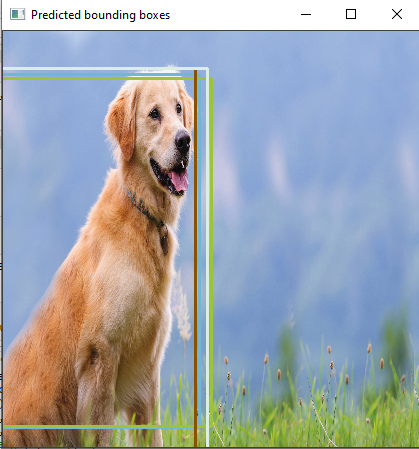

4 predictions and 4 of them for the same object... And Here is the Non Maximum Suppression (NMS). It is a class of algorithms to select one entity out of many overlapping entities. For our case, Basically it is used for eliminating extra bounding boxes and decrease the number of boxes to correct number. Let's first apply and show result, then look what is NMS.

In [71]:
overlap_thr=0.8
afterNMS = cv2.dnn.NMSBoxes(boxes, confidences,prob_thr,overlap_thr)
if len(afterNMS) > 0:
    # loop over the indexes we are keeping
    for i in afterNMS.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        # draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image_again, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(labels[classIDs[i]], confidences[i])
        cv2.putText(image_again, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
cv2.imshow("Image after NMS", image_again)
cv2.waitKey(0)

-1

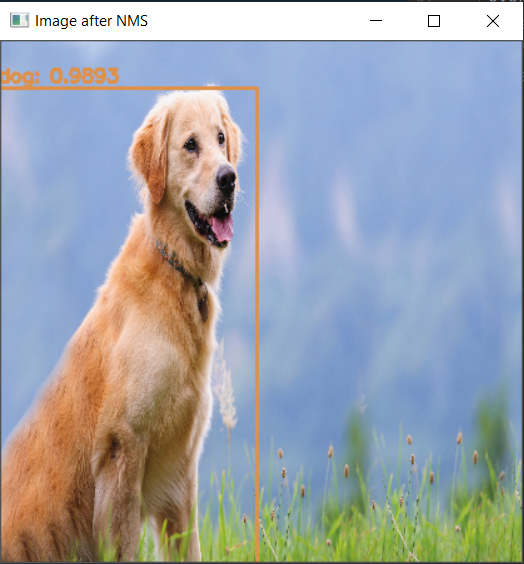

After NMS, We have just a bounding box and draw it on our image to show detection. But what does NMS return??

In [72]:
print(afterNMS)
print(len(afterNMS))
print(type(afterNMS))

[[3]]
1
<class 'numpy.ndarray'>


If you chech print results, NMS return an array. for our case it has 3 in it. When you go back and check the 4 of bounding boxes we predicted before, you will understand that it shows the '4th (index with 3) bounding box is good prediction and ignore others'. The criteria of NMS are most commonly some form of probability number and some form of overlap measure. For details, you should use 'Intersection over Union (IoU)' and 'Non Maximum Suppression (NMS)' for keywords.


I prepare this notebook to explain 'how we use yolov3 with opencv' and 'how a basic detection algorithm works'. I hope you understand consepts and it will be a guidance on your computer vision journey.

REFERENCE LINKS :
* https://towardsdatascience.com/yolo-v3-explained-ff5b850390f#:~:text=The%20output%20scheme%20for%20YOLO,differ%20from%20the%20older%20V1.&text=Each%20cell%20in%20the%20output,V2%20%E2%80%94%20one%20box%20per%20anchor.

* https://dev.to/afrozchakure/all-you-need-to-know-about-yolo-v3-you-only-look-once-e4m

* https://medium.com/analytics-vidhya/understanding-yolo-and-implementing-yolov3-for-object-detection-5f1f748cc63a

* https://towardsdatascience.com/review-yolov3-you-only-look-once-object-detection-eab75d7a1ba6

* https://gist.github.com/fabito/a49bb6a5593594f26275bc90baba6e32

* https://stackoverflow.com/questions/56208834/yolov3-convolutional-layers-count

* https://github.com/pjreddie/darknet

* https://pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/

* https://learnopencv.com/deep-learning-with-opencvs-dnn-module-a-definitive-guide/
    